In [1]:
import cv2
import dlib
import imutils
import argparse
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
from imutils import face_utils

In [2]:
known_face_encodings=[]
known_face_names=[]

In [3]:
def plt_imshow(title='image', img=None, figsize=(8,5)):
    plt.figure(figsize=figsize)
    
    if type(img) == list:
        if type(title) == list:
            titles=title
        else:
            titles=[]
        
            for i in renage(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2BGR)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i+1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) <3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [4]:
def name_labeling(input_image):
    image = input_image.copy()
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)
    
    face_names=[]
    
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.5)
        name = "Unknown"
        
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            
        face_names.append(name)
            
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if name != "Unknown":
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
            
        cv2.rectangle(image, (left, top), (right, bottom), color, 1)
        cv2.rectangle(image, (left, bottom-10), (right, bottom), color, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, name, (left+3, bottom-3), font, 0.2, (0,0,0), 1)
    
    plt_imshow("Output", image, figsize=(24,15))

In [5]:
def draw_label(input_image, coordinates, label):
    image = input_image.copy()
    (top, right, bottom, left) = coordinates
    cv2.rectangle(image,(left, top), (right, bottom), (0, 255, 0), 5)
    cv2.putText(image, label, (left-10, top-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    
    return image

def add_known_face(face_image_path, name):
    face_image = cv2.imread(face_image_path)
    face_location = face_recognition.face_locations(face_image)[0]
    face_encoding = face_recognition.face_encodings(face_image)[0]
    
    detected_face_image = draw_label(face_image, face_location, name)
    
    known_face_encodings.append(face_encoding)
    known_face_names.append(name)
    
    plt_imshow(["Input Image", "Detected Face"], [face_image, detected_face_image])

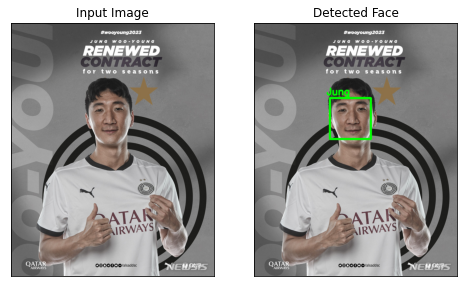

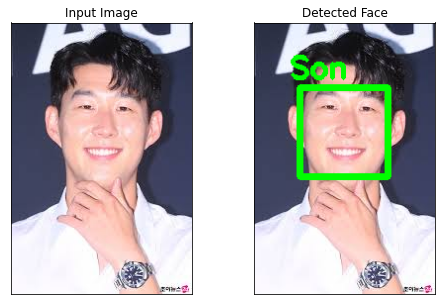

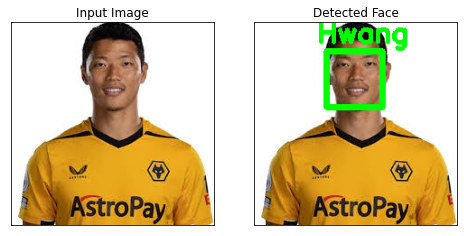

In [6]:
#add_known_face("data/test_ro.jpeg", "Ronaldo")
#add_known_face("data/test_bruno.jpeg", "Bruno")
#add_known_face("data/test_jung.jpeg", "Jung_error")
add_known_face("data/test_jung2.jpeg", "Jung")
add_known_face("data/test_son.jpeg", "Son")
add_known_face("data/test_hwang.jpeg", "Hwang")

In [7]:
# known_face_encodings=[]
# known_face_names=[]

test_image_path = "data/test_multi.jpeg"
test_image = cv2.imread(test_image_path)

if test_image is None:
    print('The image does not exist in the path')
else:
    print('image loading complete')

image loading complete


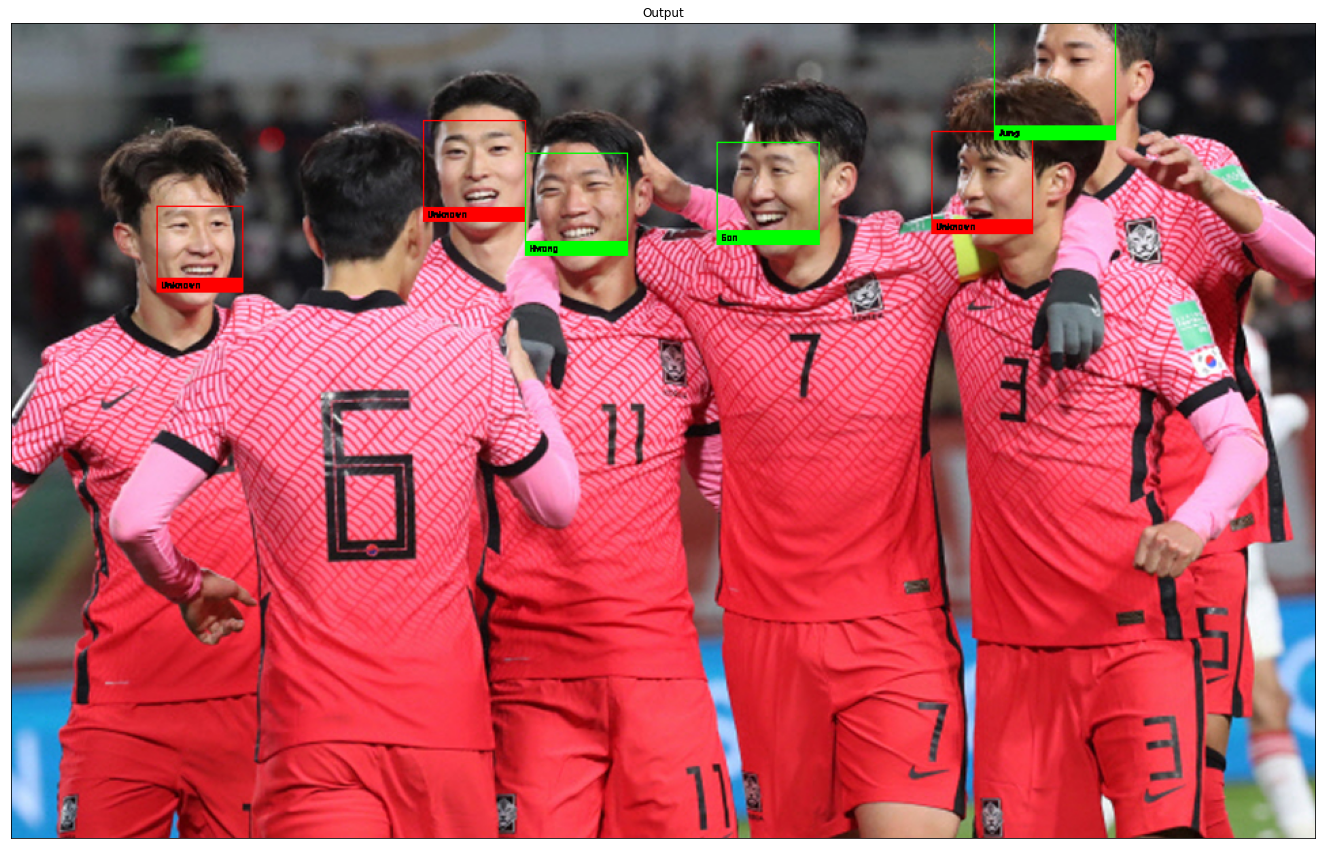

In [8]:
name_labeling(test_image)

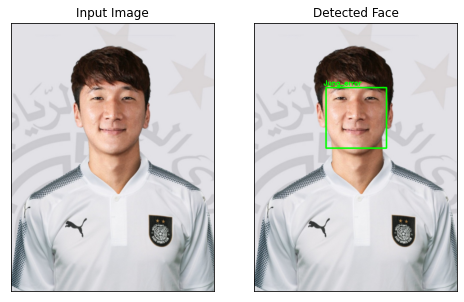

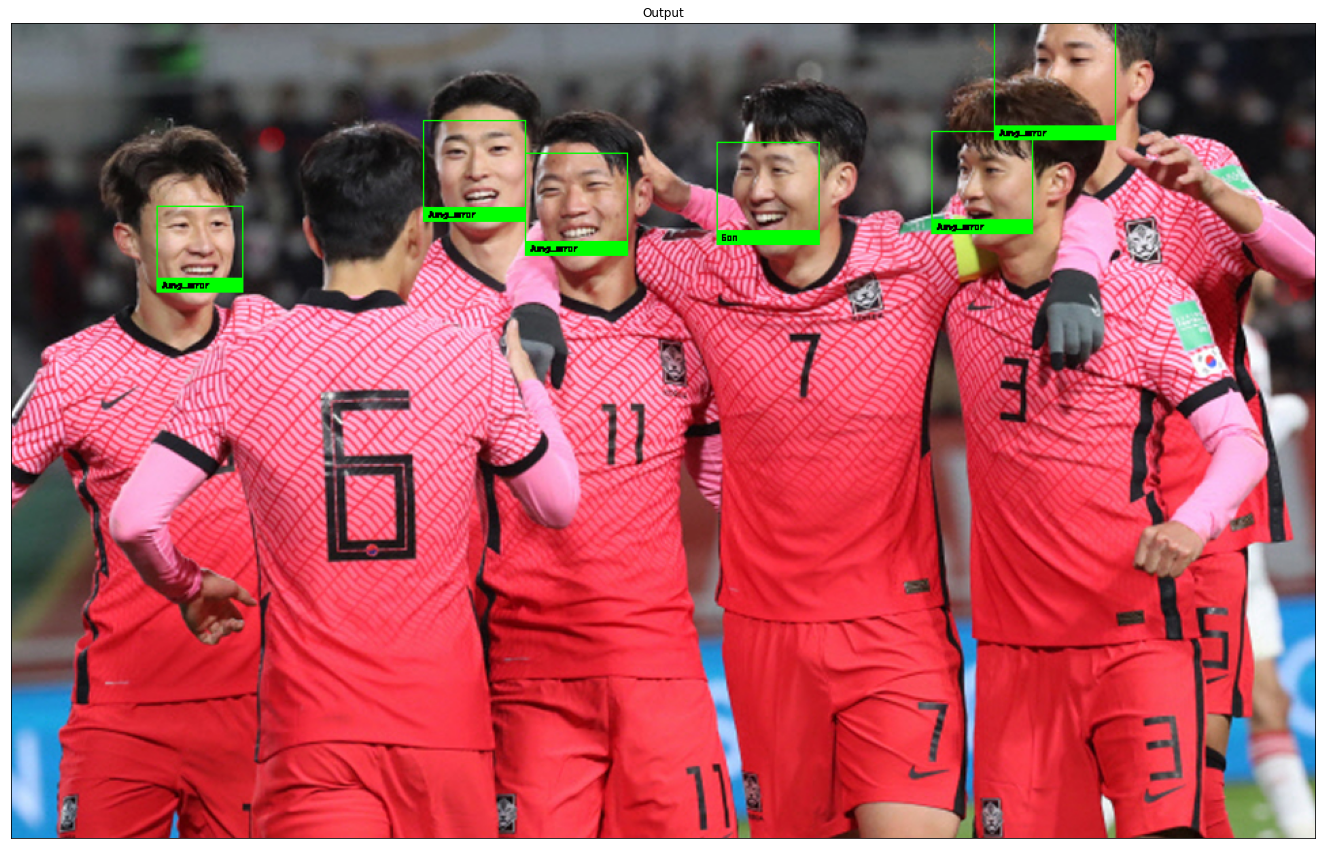

In [9]:
# Error 확인

add_known_face("data/test_jung.jpeg", "Jung_error")
name_labeling(test_image)

# 오류 및 결론 정리 

## python intentation 문제 경험

name_labeling 함수에서 "face_names.append(name)"의 위치가 tab이 하나 더 들어가 있었더니
모든 선수를 jung 이라고 인식하거나, hwang을 son이라고 인식하거나
unknown 선수를 찾지 못하는 오류가 나왔음

처음에는 동양인과 서양인에 대한 학습 차이라 생각하고 portugal 선수를 사용했으나 같은 현상 발생.
함수를 다시 확인해서 문제를 발견함.

이후 son,hwnag 만 등록한 경우에 unknown은 잘 표기됨.
하지만 문제는 남아있었음



## 성능의 문제
jung을 등록하고 찾게하면 손흥민 선수를 제외하고는 모두 jung으로 인식하는 문제는 여전
이 것은 함수가 아닌 성능 혹은 입력 data에 의한 문제로 예상됨

jung 선수의 사진을 바꿔서 test해보니 정상적으로 인식됨을 확인

## 결론
단순 사람의 얼굴을 찾는 데는 사용할 수 있지만,
등록된 인원을 찾는데는 문제가 많을 것으로 예상되어 실제 Model을 설계해야 함을 확인